# Customer Segmentation and Effective Cross Selling Project:

# Introduction:

> **Mass marketing** tactics have been used for years by many companies and it has given some good results for some of them. But, as this approach has been using companies resources in an inefficient way, it has been questioned for years and started to been seen as an expensive and time-consuming strategy. 

> So most companies already abonded this **‘one-size-fits-all’** approach. In order to use companies' resourses effectively and efficiently, they started to analyze their customers and tried to get some **segmentations** out of it. 

> The main purpose of this analysis is **to cluster customer data** into groups sharing the same properties or behavioral characteristics. By clustering customers, companies will be able to drive dynamic content and personalization tactics for an effective marketing communications.

> However, for segmentation to be used correctly, it needs to take into account that **different customers buy for different reasons**. And companies need to intelligently apply a number of considerations that could affect their purchasing decisions. A Harvard Business School professor even went as far to say that, of 30,000 new consumer products launches each year, 95% fail because of ineffective market segmentation.

> What are some of the most common segment descriptors?
  1. Demographic – basic personal information .
  2. Geographic – specific areas where customers or businesses are located,
  3. Behavioral – how customers are using your products and what type of user they are. 
  4. Preference – This can cover communication preference opt-ins, as well as which of your channels (such as online, through an app or in-store) they prefer and the time/day they are most responsive to your messages.
  5. Loyalty – For companies with loyalty programs, this can include customer activity and points earned/redeemed. Alternatively, it can be a recency, frequency, monetary (RFM) score.
  6. Value – The current value and future value (or lifetime value) in term of revenue or profitability of an individual customer.
  7. Size - The various sizes of customers who purchase company's products or services
  8. Time - Customers who signed up for a product or service during a particular time frame
****

> **In this project, we will use three of above mentioned methods in our analysis;** 

> **Behavior and Loyalty (Frequency, Recency and Tenure Analysis)**: These cohorts are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understanding the needs of the various cohorts can help a company design custom-made services or products for particular segments.

> **Time (Time Cohort Analysis)**: Time cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers' behavior depending on the time they started using the company's products or services. The time may be monthly, quarterly, even daily. 

> **Size (Moneytary Value Analysis)**: Size cohorts refer to the various sizes of customers who purchase company's products or services. This categorization can be based on the amount of spending in some period of time after acquisition, or the product type that the customer spent most of their order amount in some period of time.
****

In [3]:
# Import required packages:
import numpy as np
import pandas as pd

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import datetime as dt
import math

%matplotlib inline

# Data Preprocessing & Wrangling:

In [4]:
# Extend the screen size
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 1000)

In [5]:
# Read and save dataset as a dataframe:
from pandas import read_excel
df = read_excel('online_retail.xlsx')

In [6]:
# Get info abot the attributes of the dataset
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


> **So, here are the attributes of the dataset.**

• **InvoiceNo**: A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).

• **StockCode**: Identifier for items contained in an invoice.

• **Description**: Textual description of each of the stock item.

• **Quantity**: The quantity of the item purchased.

• **InvoiceDate**: Date of purchase.

• **UnitPrice**: Value of each item.

• **CustomerID**: Identifier for customer making the purchase.

• **Country**: Country of customer.

In [7]:
#In order to check whether column names have any white space...
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], dtype='object')

> Column Labels don't have any white space 

In [8]:
# Inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> Quantity, UnitPrice and CustomerID are either integer or float numbers. InvoiceDate is datetime64 type.
> CustomerID and Description have missing values 

In [9]:
# Inspect how many total rows and columns we have.
df.shape

(541909, 8)

In [10]:
# Count the features
print ('The total number of customers is: {}'. format(df.CustomerID.nunique()))
print ('The total number of invoices is: {}'. format(df.InvoiceNo.nunique()))
print ('The total number of dates is: {}'. format(df.InvoiceDate.nunique()))
print ('The total number of transactions is: {}'. format(len(df.index)))

The total number of customers is: 4372
The total number of invoices is: 25900
The total number of dates is: 23260
The total number of transactions is: 541909


> **Conclusion_1**:Although there are 541.909 transactions, there are only 4.372 customers and 25.900 invoices. This shows that multiple purchases are made by a single invoice and multiple invoices are taken by a single customer.

In [11]:
# Count null values for each column in the dataframe
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

>There are 135.080 missing values in CustomerID attribute, as customerID is the crucial part of the analysis, we will drop these missing values. 

In [12]:
# Drop missing values 
df = df.dropna(subset=['CustomerID'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


>So, after dropping missing values in CustomerID feature, we don't have any missing values anymore.

In [14]:
# After dropping missing values, let's count the features one more time
print ('The total number of customers is: {}'. format(df.CustomerID.nunique()))
print ('The total number of invoices is: {}'. format(df.InvoiceNo.nunique()))
print ('The total number of dates is: {}'. format(df.InvoiceDate.nunique()))
print ('The total number of transactions is: {}'. format(len(df.index)))

The total number of customers is: 4372
The total number of invoices is: 22190
The total number of dates is: 20460
The total number of transactions is: 406829


>Here are the new count numbers for critical features. Quiet interestingly, although the total number of invoices and transactions have changed, the number of customers hasn't changed.

In [15]:
# Inspect the duplicate observations
df[df.duplicated(keep=False)].count()

InvoiceNo      10062
StockCode      10062
Description    10062
Quantity       10062
InvoiceDate    10062
UnitPrice      10062
CustomerID     10062
Country        10062
dtype: int64

>There are quite a number of duplications. But we believe that it stems from the fact that the same customer can make several transactions in a single invoice (multiple purchases) or multiple invoices 

In [16]:
# Inspect two numerical attributes
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


>As there are some negative values, we can assume that these are returns

# Exploratory Data Analysis

#### Checking customer's profile

In [17]:
df.CustomerID.unique().shape

(4372,)

In [18]:
(df.CustomerID.value_counts()/sum(df.CustomerID.value_counts())*100).head(13).cumsum()

17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
15039.0    9.265809
14156.0    9.614850
18118.0    9.930462
Name: CustomerID, dtype: float64

> **Conclusion:** Although there are 4,372 customers, 10% of all orders are made by 13 customers. So these 13 customers are very high value customers for the company.

#### Checking StockCode and Descriptions

In [19]:
df.StockCode.nunique()

3684

In [20]:
df.Description.nunique()

3896

> **Conclusion:** We have a mismatch in the number of StockCode and Description, as we can see that item descriptions are more than stock code values.This means that we have multiple descriptions for some of the stock codes.
> Let's try to understand why this happens. 

In [21]:
cat_df = df.groupby(["StockCode","Description"]).count().reset_index()

In [22]:
cat_df.StockCode.value_counts()[cat_df.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,23236,4
1,23196,4
2,23126,3
3,23413,3
4,23244,3


In [23]:
df[df['StockCode'] ==cat_df.StockCode.value_counts()[cat_df.StockCode.value_counts()>1].reset_index()['index'][6]]['Description'].unique()

array(['SET 12 COLOURING PENCILS DOILY', 'SET 12 COLOUR PENCILS DOILEY',
       'SET 12 COLOURING PENCILS DOILEY'], dtype=object)

>**Conclusion:** We can see why there are multiple descriptions for some stock codes. Putting an extra white space or just some spelling errors can corrupt our dataset 

In [24]:
# Checking customers' dsitribution (country-wise)
table = df.groupby('Country')['CustomerID'].nunique()
table_2 = table.sort_values(ascending = False).head(10)

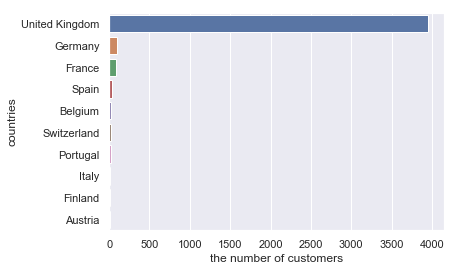

In [25]:
# Set seaborn style
sns.set(color_codes=True)

# Plot histogram
ax = sns.barplot(y= table_2.index, x=table_2.values)
ax.set(ylabel="countries")
ax.set(xlabel='the number of customers')
plt.show()

In [26]:
# Checking the top 10 countries the retailer is selling its items to, and the volumes of sales for those countries.
df.Country.value_counts().head(10)

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: Country, dtype: int64

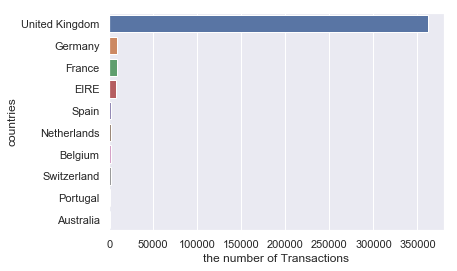

In [27]:
# Checking the top 10 countries the retailer is selling its items to, and the volumes of sales for those countries.
country_counts = df.Country.value_counts().head(10)

# Set seaborn style
sns.set(color_codes=True)

# Plot histogram
ax = sns.barplot(y= country_counts.index, x=country_counts.values)
ax.set(ylabel="countries")
ax.set(xlabel='the number of Transactions')
plt.show()

In [28]:
# In order to see the total amount for each transaction, we add a new column named "Amount", 
df['Amount'] = df.Quantity*df.UnitPrice
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


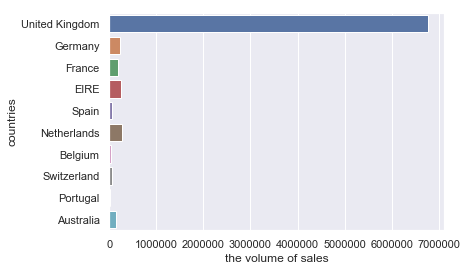

In [29]:
# Creating a loop in order to calculate the total amount sale to the top 10 countries
country_total = []
lst = []
for i in country_counts.index:
    country_total =df[df.Country ==i].Amount.sum()
    lst.append(country_total)

# Checking the Total Amount of sales for top countries.
country_counts = df.Country.value_counts().head(10)

# Plot histogram
ax = sns.barplot(y= country_counts.index, x=lst)
ax.set(ylabel="countries")
ax.set(xlabel="the volume of sales")
plt.show()

In [30]:
# We categorize the unit price in order to check company's price portfolio 
# So, we name the unit price 'low' if a number is in the interval [$0, $3], 
# 'mid' for ($3, $7], 
# 'mid_high' for ($7, $10], 
# 'high' above $10.
category = pd.cut(df['UnitPrice'], bins=[0, 3, 7, 10, 100000], include_lowest=True, labels=['low', 'mid', 'mid_high', 'high'])

In [31]:
category.value_counts(normalize = True)

low         0.723233
mid         0.184945
mid_high    0.062955
high        0.028867
Name: UnitPrice, dtype: float64

>Only 2.9% of the sales are more expensive than $10.

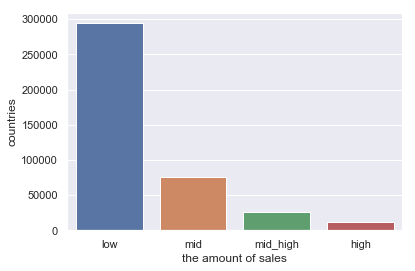

In [32]:
a= category.value_counts()
# Plot histogram
ax = sns.barplot(x= a.index, y=a.values)
ax.set(ylabel="countries")
ax.set(xlabel="the amount of sales")
plt.show()

>90 % of the items price are equal to or less than $7.

In [33]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


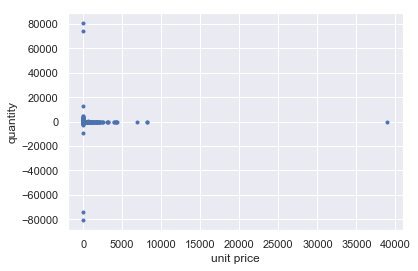

In [34]:
# Make a scatter plot in order to check whether there is a correlation between unit price and quantity.
plt.plot(df.UnitPrice, df.Quantity, marker='.', linestyle='none')

# Label the axes
plt.xlabel('unit price')
plt.ylabel('quantity')

# Show the result
plt.show()

>In order to better visualize the scatterplot, we drop the outliers in UnitPrice and Quantity features

In [36]:
df_normalized = df[(df['UnitPrice'] <= 20) & (df['Quantity'] <= 100) & (df['Quantity'] >= -100)]  

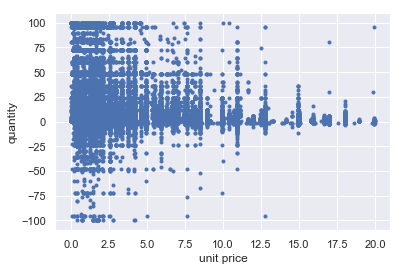

In [37]:
# Make a scatter plot in order to check whether there is a correlation between unit price and quantity.
plt.plot(df_normalized.UnitPrice, df_normalized.Quantity, marker='.', linestyle='none')

# Label the axes
plt.xlabel('unit price')
plt.ylabel('quantity')

# Show the result
plt.show()

>We pick a sample of 1000 and try to find the correlation between 

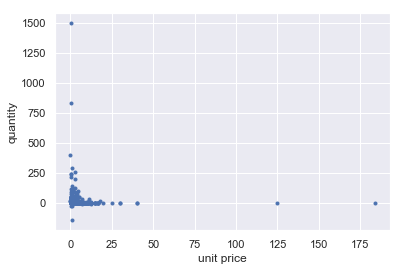

In [38]:
df_sample= df.sample(n = 1000) 
# Make a scatter plot
plt.plot(df_sample.UnitPrice, df_sample.Quantity, marker='.', linestyle='none')

# Label the axes
plt.xlabel('unit price')
plt.ylabel('quantity')

# Show the result
plt.show()

> **Conclusion_2**: There is no correlation between quantity and item price. 

In [39]:
# Check the types of features in order to extract years, months and days.
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Amount                float64
dtype: object

In [40]:
# Create a function by passing a datetime object extracting year, month and day from x

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    
    return year, month, day

In [41]:
# Extract year, month and day from InvoiceDate

invoice_year, invoice_month, invoice_day = get_date_int(df, 'InvoiceDate')

In [42]:
# Create an InvoiceYear, InvoiceMonth, InvoiceDay column

df['InvoiceYear']= invoice_year
df['InvoiceMonth']= invoice_month
df['InvoiceDay']= invoice_day

In [43]:
# Check whether we created the InoviceYear, InvoiceMonth and InvoiceDay columns

df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceYear,InvoiceMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1


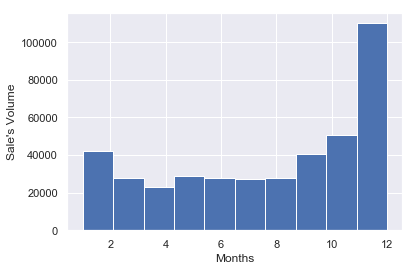

In [44]:
# Check on which month there are more sales.

plt.hist(df.InvoiceMonth)
plt.xlabel('Months')
plt.ylabel("Sale's Volume")
plt.show()

>**Conclusion_3:** There are more sales in December, most probably due to Christmass Shoppings.

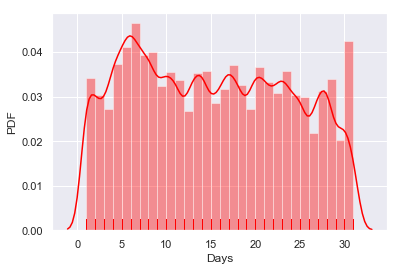

In [45]:
# Check on which days there are more sales

j = df.InvoiceDay
sns.distplot(j, rug='True', bins=30, color = 'red')
plt.xlabel('Days')
plt.ylabel('PDF')
plt.show()

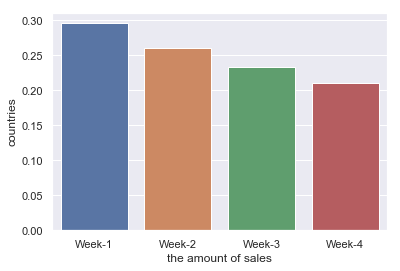

In [46]:
# Check in which weeks are there more sales.

lst3 = df.InvoiceDay.value_counts(normalize=True, sort=True, bins = 4)
lst4 = ['Week-1','Week-2','Week-3','Week-4']

# Plot histogram
ax = sns.barplot(x= lst4, y=lst3.values)
ax.set(ylabel="countries")
ax.set(xlabel="the amount of sales")
plt.show()

> **Conclusion_4:** There are more sales in the first weeks of the months as most people get their pay checks at on first or second day of each month.

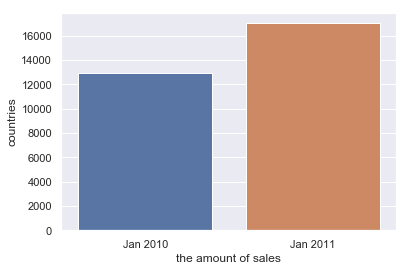

In [47]:
# Compare the overlaping period of 2011 and 2010 

grouping2 = df[(df.InvoiceYear ==2010) & (df.InvoiceMonth ==12)&(df.InvoiceDay <9)]['Quantity'].count()
grouping3 = df[(df.InvoiceYear ==2011) & (df.InvoiceMonth ==12)&(df.InvoiceDay <9)]['Quantity'].count()

lst1 = [grouping2,grouping3]
lst2 = ['Jan 2010','Jan 2011']

# Plot histogram
ax = sns.barplot(x= lst2, y=lst1)
ax.set(ylabel="countries")
ax.set(xlabel="the amount of sales")
plt.show()

> **Conclusion_5:** The overlaping period for two years is the first 8 days of January. So we compare the these two periods and we can see that there is 50% more sales in 2011.

In [48]:
# Check the rate of item returns

return_rate = df[df.Quantity<0].Quantity.sum() / df[df.Quantity>0].Quantity.sum()
print (f"The return rate of items: {(return_rate.round(2))}")

The return rate of items: -0.05


> **Conclusion_6**: Their average return rate for the Top 500 merchants is 4.96%. As this company's return rate is 5%, it is around the average.

In [49]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceYear,InvoiceMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1


In [50]:
# Extract year, month and day from InvoiceDate

invoice_year_2, invoice_month_2, invoice_day_2 = get_date_int(df_normalized, 'InvoiceDate')
df_normalized['InvoiceMonth_2']= invoice_month_2

/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


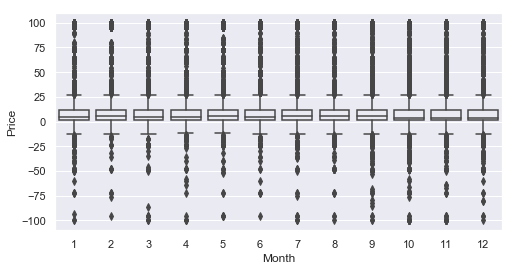

In [51]:
plt.figure(figsize = (8,4))
sns.boxplot(x='InvoiceMonth_2', y='Quantity', data=df_normalized, boxprops = {'facecolor':'None'})
#sns.swarmplot(x = 'InvoiceMonth', y = 'Amount', data = df)

# Label the axes
plt.xlabel('Month')
plt.ylabel('Price')

# Show the plot
plt.show()

# Hypothesis Testing

#### Testing whether UK and Other countries have different mean for the average sale (Amount divided by the number of Customers).

(The null hypothesis) Ho: UK and other countries have mean difference = 0 (Ho: μ1 = μ2)

(The alternative hypothesis) Ha: UK and other countries have mean difference ≠ 0 (H1: μ1 ≠ μ2)

### Z-Test

In [52]:
# Split the dataset into two parts (UK and non-UK)

df_UK = df[df['Country']=='United Kingdom']
df_Others = df[df['Country']!='United Kingdom']

In [53]:
# Find the total amount of sale for UK and Other Countries

df_UK['Amount'] = df_UK.Quantity*df_UK.UnitPrice
df_Others['Amount'] = df_Others.Quantity*df_Others.UnitPrice

/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [54]:
# Find the total number of customers for UK and other countries

customer_counts_UK = df_UK['CustomerID'].nunique()
customer_counts_Others = df_Others['CustomerID'].nunique()

In [55]:
## Z-test statistics

# Find the average sale of customers (for UK and other countries)

UK_mean = df_UK['Amount'].sum()/customer_counts_UK
Others_mean = df_Others['Amount'].sum()/customer_counts_Others

# Find the variance for low and high capacity
UK_var = df_UK['Amount'].var()  
Others_var = df_Others['Amount'].var()

UK_ln = len(df_UK['Amount'])         
Others_ln = len(df_Others['Amount'])         

z = (UK_mean - Others_mean) / np.sqrt(UK_var/UK_ln + Others_var/Others_ln)
print ('Z-score: {}'.format(z))

Z-score: -2150.093565947388


In [56]:
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))

p-value:2.0


In [57]:
phat = (UK_mean + Others_mean) / (UK_ln + Others_ln)
moe = 1.96 * np.sqrt(phat * (1 - phat) * (( 1/ float(UK_ln)) + (1/float(Others_ln))))
print("Margin of Error: {}".format(moe))

Margin of Error: 0.0011160256822119546


In [58]:
diff_mean = UK_mean - Others_mean
ci = diff_mean + np.array([-1, 1]) * moe
print("Confidence interval: {}".format(ci))

Confidence interval: [-1917.40317178 -1917.40093973]


>**Conclusion_7:** UK and other countries don't have mean difference in average sale 

#### Repeat the testing with equal size samples from both parts (UK and non-UK) 

In [59]:
UK_sample = df_UK.sample(n = 10000)
Others_sample = df_Others.sample(n = 10000)

In [60]:
# Find the total number of customers for UK and other countries

customer_counts_UK = UK_sample['CustomerID'].nunique()
customer_counts_Others = Others_sample['CustomerID'].nunique()

In [61]:
## Z-test statistics

# Find the average sale of customers (for UK and other countries)

UK_mean = UK_sample['Amount'].sum()/customer_counts_UK
Others_mean = Others_sample['Amount'].sum()/customer_counts_Others

# Find the variance for low and high capacity
UK_var = UK_sample['Amount'].var()  
Others_var = Others_sample['Amount'].var()

UK_ln = len(UK_sample['Amount'])         
Others_ln = len(Others_sample['Amount'])         

z = (UK_mean - Others_mean) / np.sqrt(UK_var/UK_ln + Others_var/Others_ln)
print ('Z-score: {}'.format(z))

Z-score: -595.8193251170923


In [62]:
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))

p-value:2.0


>**Conclusion_7:** P-value is greater than 0.05, so we fail to reject Null Hypoyhesis, which means that UK and Other countries' average sale aren't statistically different. (Even though UK is the major destions for most transactions) 

### T-Test

In [63]:
#Calculate the T-test for the means of two independent samples of scores.

t, p = stats.ttest_ind(UK_sample['Amount'], Others_sample['Amount'])
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -12.00782900734214
p-value: 4.201328778102562e-33


>**Conclusion_8**: P-value is greater than 0.05, so we fail to reject Null Hypoyhesis, which means that UK and Other countries' average sale aren't statistically different.

# Elements of Cohort Analysis

* **Pivot Table:** 

The cohort analysis data is typically formatted as a pivot table. 

* **Assigned cohort in rows:** 

The row values represent the cohort. In our example, it is the month of the first purchase and customers are pooled into these groups based on their first ever purchase

* **Cohort index in columns:** 

The column values represent months since acquisition. 

* **Metrics in the table:** 

Here, we have the count of active customers. 

# Creating Customer Cohorts

## Step-1 Extracting year, month and day from InvoiceDate column

In [64]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceYear,InvoiceMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1


Now, we will create a function that truncates a given date object to a first day of the month. In another word, create a function by passing a datetime object extracting year, month and day from x

In [65]:
def get_month(x): return dt.datetime(x.year, x.month,1)

Then we apply it to the InvoiceDate and create an InvoiceMonth column

In [66]:
df['InvoiceMonthWhole'] = df['InvoiceDate'].apply(get_month)

In [67]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceMonthWhole
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,2010-12-01


We create a groupby() object with CustomerID and use the InvoiceMonth column for the further manipulation. (Group by CustomerID and select the InvoiceMonth value)

In [68]:
grouping = df.groupby('CustomerID')['InvoiceMonthWhole'] 

We use transform( ) together with a min( ) function to assign the smallest InvoiceMonth value to each customer.

In [69]:
df['CohortMonthWhole'] = grouping.transform('min')

In [70]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceMonthWhole,CohortMonthWhole
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,2010-12-01,2010-12-01


## Step-2 Calculating the time offset

Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

We already created 3 variables (InvoiceYear, InvoiceMonth, InvoiceDay). Now, we will create 3 extra variables (CohortYear, CohortMonth, CohortDay)  that capture the integer value of years, months and days for Invoice and Cohort Date by using the get_date_int() function which was created already. 

In [71]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

Now, we will calculate the number of months between any transaction and the first transaction for each customer. We will use InvoiceMonth and CohortMonth values to do this. We will start by creating two object with year and month integer values from each of the InvoiceMonth and CohortMonth variables.

In [72]:
CohortYear, CohortMonth, _=get_date_int(df, 'CohortMonthWhole')

In [73]:
# Create an CohortYear, CohortMonth column

df['CohortYear']= CohortYear
df['CohortMonth']= CohortMonth


Next, we will calculate the differences in years and months between them.

In [74]:
years_diff = df.InvoiceYear - df.CohortYear
months_diff = df.InvoiceMonth - df.CohortMonth

Defining a cohort is the first step to cohort analysis. We will now create monthly cohorts based on the month each customer has made their first transaction.

In [75]:
# Calculate the number of months for the CohortIndex (12 months in a year) 
# Create a new column (CohortIndex) 

df['CohortIndex'] = years_diff * 12 + months_diff + 1 # +1 is added, as we want to start the index with 1. 

In [76]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceMonthWhole,CohortMonthWhole,CohortYear,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,2010-12-01,2010-12-01,2010,12,1


## Step-3: Calculate the number of monthly active customers in each cohort and make the cohort counts table

Let's pull some metrics: we will calculate the number of monthly active customers in each cohort.

First, we will create a groupby object with CohortMonth and CohortIndex

In [77]:
grouping  = df.groupby(['CohortMonthWhole' , 'CohortIndex'])

Then, we will count number of customers in each group by applying pandas nunique() function

In [78]:
cohort_data = grouping['CustomerID'].nunique()

Then, we reset the index

In [79]:
cohort_data = cohort_data.reset_index()

Create a pandas pivot with CohortMonth in the rows, CohortIndex in the columns and CustomerID counts as values

In [80]:
cohort_counts = cohort_data.pivot( index= 'CohortMonthWhole',
                                   columns= 'CohortIndex',
                                   values= 'CustomerID')

#### Cohorts Table

In [81]:
# Rows are first activity (month of acquisition)
# Columns are time since first activity
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonthWhole,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column with cohort index "one" represents the total number of customers in that cohort. 

Let's look at the table- we can see that the first cohort was acquired in December 2010, there are 948 customers in it. 

## Step-4: Calculate Cohort Metrics (customer retention rate table and the average purchase quantity table)

## Retention

**Retention:** It measures how many customers from each of the cohort returned in the subsequent months.

**Retention Rate:** The ratio of how many customers came back in the subsequent months.

In [82]:
# Store the first column as cohort_sizes

cohort_sizes = cohort_counts.iloc[:,0]

In [83]:
cohort_sizes

CohortMonthWhole
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1, dtype: float64

In [84]:
# we will use the divide() function on the cohort_counts dataframe and pass the cohort_sizes.
# We set the axis parameter to zero to ensure that we divide along the row axis

# Divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [85]:
# Review the retention table (All numbers below shows % percent)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonthWhole,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we can examine our retention table. As you can see, the first column has a 100% retention rate for all cohorts, as expected. We can compare the retention rate over time and across cohorts to evaluate the health of our customer's shopping habits

> **Conclusion_9**: Based on the retention table, we can say that Christmass (January and December) Cohort has better shopping habits. The percantage of customers coming back in subsequent months are higher than other months (maybe due to some promotions or advertisements)

In [86]:
[item.date() for item in cohort_sizes.index.tolist()]

[datetime.date(2010, 12, 1),
 datetime.date(2011, 1, 1),
 datetime.date(2011, 2, 1),
 datetime.date(2011, 3, 1),
 datetime.date(2011, 4, 1),
 datetime.date(2011, 5, 1),
 datetime.date(2011, 6, 1),
 datetime.date(2011, 7, 1),
 datetime.date(2011, 8, 1),
 datetime.date(2011, 9, 1),
 datetime.date(2011, 10, 1),
 datetime.date(2011, 11, 1),
 datetime.date(2011, 12, 1)]

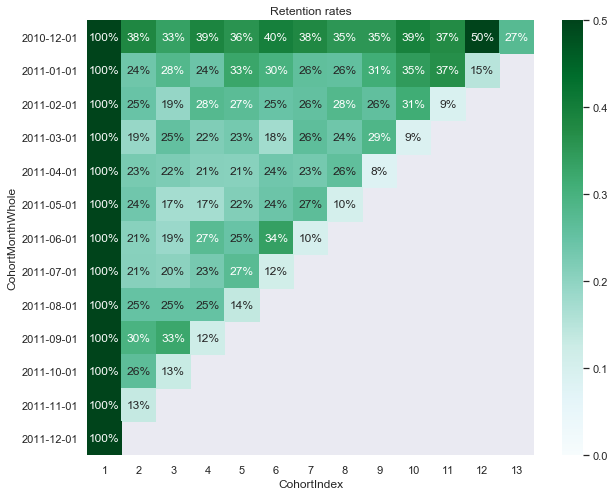

In [87]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%', yticklabels = [item.date() for item in cohort_sizes.index.tolist()] ,  vmax = 0.5,vmin = 0.0,cmap = 'BuGn') 
plt.show()

## Average Quantity

In [88]:
# we create a groupby () object with CohortMonth and CohortIndex and store it as grouping.

grouping3 = df.groupby(['CohortMonthWhole', 'CohortIndex'])

In [89]:
grouping3.first()

InvoiceNo StockCode                          Description  Quantity         InvoiceDate  UnitPrice  CustomerID         Country  Amount  InvoiceYear  InvoiceMonth  InvoiceDay InvoiceMonthWhole  CohortYear  CohortMonth
CohortMonthWhole CohortIndex                                                                                                                                                                                                                        
2010-12-01       1              536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30         2010            12           1        2010-12-01        2010           12
                 2              540001     21733     RED HANGING HEART T-LIGHT HOLDER        32 2011-01-04 10:22:00       2.55     18097.0  United Kingdom   81.60         2011             1           4        2011-01-01        2010           12
                 3              542776     21671         RED SPOT CERAMIC DRAWER KNOB        48 2011-02-01 08:23:00       1.25     15240.0  United Kingdom   60.00         2011             2           1        2011-02-01        2010           12
                 4              545222     22957  SET 3 PAPER VINTAGE CHICK PAPER EGG         6 2011-03-01 08:49:00       2.95     13880.0  United Kingdom   17.70         2011             3           1        2011-03-01        2010           12
                 5              548554     21043          APRON MODERN VINTAGE COTTON        60 2011-04-01 09:19:00       1.95     13694.0  United Kingdom  117.00         2011             4           1        2011-04-01        2010           12
                 6              551516     21067              VINTAGE RED TEATIME MUG         1 2011-05-01 11:10:00       1.25     14800.0  United Kingdom    1.25         2011             5           1        2011-05-01        2010           12
                 7              555160     22383               LUNCH BAG SUKI DESIGN        100 2011-06-01 09:18:00       1.45     14646.0     Netherlands  145.00         2011             6           1        2011-06-01        2010           12
                 8              558640     21094        SET/6 RED SPOTTY PAPER PLATES        12 2011-07-01 08:58:00       0.85     14911.0            EIRE   10.20         2011             7           1        2011-07-01        2010           12
                 9              561906     22367      CHILDRENS APRON SPACEBOY DESIGN         8 2011-08-01 10:03:00       1.95     12921.0  United Kingdom   15.60         2011             8           1        2011-08-01        2010           12
                 10             565082     22423             REGENCY CAKESTAND 3 TIER         2 2011-09-01 09:15:00      12.75     13305.0  United Kingdom   25.50         2011             9           1        2011-09-01        2010           12
                 11             569203     79321                        CHILLI LIGHTS        48 2011-10-02 10:32:00       4.95     16353.0  United Kingdom  237.60         2011            10           2        2011-10-01        2010           12
                 12             573745     21174     POTTERING IN THE SHED METAL SIGN        12 2011-11-01 08:53:00       2.08     17419.0  United Kingdom   24.96         2011            11           1        2011-11-01        2010           12
                 13            C579890     84947    ANTIQUE SILVER TEA GLASS ENGRAVED        -1 2011-12-01 08:14:00       1.25     15197.0  United Kingdom   -1.25         2011            12           1        2011-12-01        2010           12
2011-01-01       1              539993     22386              JUMBO BAG PINK POLKADOT        10 2011-01-04 10:00:00       1.95     13313.0  United Kingdom   19.50         2011             1           4        2011-01-01        2011            1
                 2             C542781     21731        RED TOADSTOOL LED NIGHT LIGHT       -12 2011-02-01 09

In [90]:
# we call grouping object, select the Quantity column and calculate the average and we store the results as cohort_data

cohort_data = grouping3['Quantity'].mean()

In [91]:
cohort_data.head()

CohortMonthWhole  CohortIndex
2010-12-01        1              11.037691
                  2              14.603253
                  3              14.982141
                  4              14.801090
                  5              12.943024
Name: Quantity, dtype: float64

In [92]:
# we reset the index before calling the pivot function to be able to access the columns now stored as indices

cohort_data = cohort_data.reset_index()

# Finally, we create a pivot table by passing CohortMonth to the index parameter, CohortIndex to the colmuns parameter, and the Quantity to the values parameter.

average_quantity = cohort_data.pivot(index= 'CohortMonthWhole',
                                     columns='CohortIndex',
                                     values='Quantity')
# Round it up to 1 digit.

average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonthWhole,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **Conclusion_10**: Decembers and January cohorts have higher average quantity, which means that they shop more than other cohorts.  

## Average Price

In [93]:
# Calculate the average of the unit price 
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonthWhole', columns='CohortIndex', values='UnitPrice')

# Round it up to 1 digit.
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonthWhole,,,,,,,,,,,,,
2010-12-01,3.2,3.2,3.2,3.6,2.9,5.0,3.2,3.2,3.5,3.0,3.3,2.8,2.8
2011-01-01,3.5,3.7,3.1,8.4,3.2,3.2,2.9,2.7,2.6,5.5,2.9,2.6,NaN
2011-02-01,3.3,4.4,4.8,3.1,3.0,2.8,2.8,3.2,2.9,2.9,3.2,NaN,NaN
2011-03-01,3.3,5.0,3.7,3.3,3.6,2.8,2.8,2.8,2.7,2.5,NaN,NaN,NaN
2011-04-01,3.4,4.0,3.3,2.7,3.0,2.9,2.9,2.8,2.6,NaN,NaN,NaN,NaN
2011-05-01,4.6,3.2,2.6,3.2,2.7,2.5,2.6,2.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.4,3.2,3.3,2.8,2.6,3.5,2.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.5,3.5,2.7,2.7,2.4,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.0,5.4,5.7,7.0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **Conclusion_11**: The average price for all cohorts are between 2 and 5 dollars. 

# Behavior Cohort Analysis

### Behavioral customer segmentation based on identified metrics:
   > **RFM (Recency, Frequency, Monetary Value) Segmentation**
   
   > **RFMT(Recency, Frequency, Monetary Value, Tenure) Segmenation**
   
   > **RFMTS(Recency, Frequency, Monetary Value, Tenure, Send Back) Segmenation**

### a. Recency (R): 
**How recent was each customer's last purchase, 

### b. Frequency (F):

**How many purchases the customer has done in the last 12 months

### c. Monetary Value (M):
** How much has the customer spent in the last 12 months.

### d. Tenure (T):
** When did customer make his/her first purchase.

### e. Send Back (S): 

** How satisfied is the customer (High return rate (in terms of monetary value) shows higher dissatisfaction) 

We will use these values to assign customers to RFM segments. Once we calculated these numbers, the next step is to group them into some sort of categorization such as high, medium and low.
There are multiple ways to do that. We can break customers into groups of equal size based on;

> Percentiles e.g. quantiles: percentile values of each metric.

> Pareto 80/20 cut: We can assign either high or low value to each metric based on a 80/20 % Pareto split. 

> Custom - based on business knowledge: we can use existing knowledge from previous business insights about certain threshold values for each metric. 

Now, you will assign a percentile to a metric, and then create a label to be used for segmentation. 

The process of calculating percentiles is fairly simple: 
> First, you sort the customers based on that metric, 

> Then, you break the customers into a number of groups that you think is relevant. The groups are equal in size. 

> Finally, you assign a label to each group. 

**When assigning labels we want them to represent what is the top and the bottom percentile based on sorted values, but the highest value of the metric is not always the best. For example the recency metric which calculates days since the last purchase, is better when it is low rather than high.** 

## Creating RFMT Table

We're starting with a pre-processed online DataFrame with only the latest 12 months of data:

In [94]:
print('Min:{}; Max:{}'.format(min(df.InvoiceDate), max(df.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


Let's create a hypothetical snapshot_day data as if we're doing analysis recently

In [95]:
import datetime
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)

In [96]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [97]:
# Aggregate data on a customer level

datamart= df.groupby(['CustomerID']).agg({ 
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 
    'InvoiceNo': 'count',
    'Amount': 'sum',
    'InvoiceMonthWhole': lambda x: (snapshot_date - x.min()).days})

# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency', 
                           'InvoiceNo': 'Frequency',
                           'Amount': 'MonetaryValue',
                           'InvoiceMonthWhole': 'Tenure'}, inplace=True)

In [98]:
datamart['MonetaryValue'] = datamart['MonetaryValue'].round(2)

In [99]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12346.0,326,2,0.00,343
12347.0,2,182,4310.00,374
12348.0,75,31,1797.24,374
12349.0,19,73,1757.55,39
12350.0,310,17,334.40,312


>Our table for RFMT segmentation is completed!

### Creating Recency Quartile

In [100]:
# Let's create a list of labels-only this time the values are reversed as lower recency is rated higher.
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels) 
datamart = datamart.assign(R = r_quartiles.values)

In [101]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R
CustomerID,,,,,
12346.0,326,2,0.00,343,1
12347.0,2,182,4310.00,374,4
12348.0,75,31,1797.24,374,2
12349.0,19,73,1757.55,39,3
12350.0,310,17,334.40,312,1


### Creating Frequency and Monetary Quartiles

In [102]:
f_labels = range(1,5) 
m_labels = range(1,5)

f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels) 
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)

datamart = datamart.assign(F = f_quartiles.values) 
datamart = datamart.assign(M = m_quartiles.values)

### Creating Tenure Quartile

In [103]:
t_labels = range(1,5) 

t_quartiles = pd.qcut(datamart['Tenure'], 4, labels = t_labels) 

datamart = datamart.assign(T = t_quartiles.values) 

In [104]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T
CustomerID,,,,,,,,
12346.0,326,2,0.00,343,1,1,1,3
12347.0,2,182,4310.00,374,4,4,4,4
12348.0,75,31,1797.24,374,2,2,4,4
12349.0,19,73,1757.55,39,3,3,4,1
12350.0,310,17,334.40,312,1,1,2,3


### Creating Send Back Quartile

In [105]:
#df['Amount'][df.Amount<0].value_counts().sort_index()

In [106]:
s_quartiles = pd.cut(datamart['MonetaryValue'],[-np.inf,-100,-10,0,np.inf],right=False, labels = range(1,5))

datamart = datamart.assign(S = s_quartiles.values) 

In [107]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,S
CustomerID,,,,,,,,,
12346.0,326,2,0.00,343,1,1,1,3,4
12347.0,2,182,4310.00,374,4,4,4,4,4
12348.0,75,31,1797.24,374,2,2,4,4,4
12349.0,19,73,1757.55,39,3,3,4,1,4
12350.0,310,17,334.40,312,1,1,2,3,4


## Building RFM Segment and RFM Score

> Concatenate RFM quartile values to RFM_Segment 

> Sum RFM quartiles values to RFM_Score

In [108]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M']) 
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1) 
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

In [109]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,S,RFM_Segment,RFM_Score
CustomerID,,,,,,,,,,,
12346.0,326,2,0.00,343,1,1,1,3,4,111,3.0
12347.0,2,182,4310.00,374,4,4,4,4,4,444,12.0
12348.0,75,31,1797.24,374,2,2,4,4,4,224,8.0
12349.0,19,73,1757.55,39,3,3,4,1,4,334,10.0
12350.0,310,17,334.40,312,1,1,2,3,4,112,4.0


## Analyzing RFM segments

**Largest RFM segments**

In [110]:
#datamart.groupby('RFM_Segment').size()

In [111]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    471
111    392
122    209
344    206
211    181
333    176
222    173
233    164
433    156
322    126
dtype: int64

> **Conclusion_12:** The largest RFM segment is 444, which means they are frequent and recent customers and also they have higher spending habit. So, the number of people belonging to this group is 471, which is 10% of total population. And also beacuse of their shopping pattern, this group of people is our primary target group.

**Filtering on RFM segments**

Select bottom RFM segment "111" and view top 5 rows

In [112]:
datamart[datamart['RFM_Segment']=='111'].head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,S,RFM_Segment,RFM_Score
CustomerID,,,,,,,,,,,
12346.0,326,2,0.0,343,1,1,1,3,4,111,3.0
12353.0,204,4,89.0,223,1,1,1,2,4,111,3.0
12361.0,287,10,189.9,312,1,1,1,3,4,111,3.0
12401.0,303,5,84.3,312,1,1,1,3,4,111,3.0
12402.0,323,11,225.6,343,1,1,1,3,4,111,3.0


**Summary metrics per RFM Score**

In [113]:
datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0         264.8       7.8         109.1   392
4.0         174.5      13.9         227.1   391
5.0         153.0      21.2         346.8   517
6.0          94.3      28.5         491.8   468
7.0          78.8      39.7         724.2   447
8.0          62.7      57.0         974.7   467
9.0          44.2      79.0        1369.6   411
10.0         31.3     115.3        1894.0   440
11.0         20.5     193.9        3845.7   368
12.0          6.7     371.8        8850.7   471

**Grouping into named segments**

Use RFM score to group customers into Gold, Silver and Bronze segments.

In [114]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return '1.Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return '2.Silver' 
    else:
        return '3.Bronze'

In [115]:
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)

In [116]:
datamart.groupby('General_Segment').agg({ 
    'Recency': 'mean',
    'Frequency': 'mean', 
    'MonetaryValue': ['mean','sum', 'count']
}).round(1)

Recency Frequency MonetaryValue                 
                   mean      mean          mean        sum count
General_Segment                                                 
1.Gold             25.2     195.1        4130.3  6980190.8  1690
2.Silver           98.9      36.1         625.8  1188323.3  1899
3.Bronze          219.7      10.9         168.0   131551.7   783

>**Conclusion_13:** The largest segment is our Gold customers. Their spending is almost 90% of total amount and their average spending is 7 times more than Silver Customers and 20 times more than Bronze customers. So Gold segment would be the primary target for our promotions and advertisements.

## Analyzing RFMT segments

In [117]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])+ str(x['T']) 
datamart['RFMT_Segment'] = datamart.apply(join_rfm, axis=1) 
datamart['RFMT_Score'] = datamart[['R','F','M','T']].sum(axis=1)

In [118]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,S,RFM_Segment,RFM_Score,General_Segment,RFMT_Segment,RFMT_Score
CustomerID,,,,,,,,,,,,,,
12346.0,326,2,0.00,343,1,1,1,3,4,111,3.0,3.Bronze,1113,6.0
12347.0,2,182,4310.00,374,4,4,4,4,4,444,12.0,1.Gold,4444,16.0
12348.0,75,31,1797.24,374,2,2,4,4,4,224,8.0,2.Silver,2244,12.0
12349.0,19,73,1757.55,39,3,3,4,1,4,334,10.0,1.Gold,3341,11.0
12350.0,310,17,334.40,312,1,1,2,3,4,112,4.0,3.Bronze,1123,7.0


In [119]:
#Largest RFMT Segments
datamart.groupby('RFMT_Segment').size().sort_values(ascending=False)[:10]

RFMT_Segment
4444    262
1112    214
2111    132
1222    118
3111    106
1113     98
2221     90
4442     89
4443     87
3444     80
dtype: int64

In [120]:
# Summary metrics for RFMT
datamart.groupby('RFMT_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'],
    'Tenure': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue       Tenure      
              mean      mean          mean count   mean count
RFMT_Score                                                   
5.0          166.0       8.3         129.8   346  183.5   346
6.0          156.5      12.8         214.8   443  184.0   443
7.0          154.2      20.9         316.2   568  193.8   568
8.0          129.4      29.9         486.0   426  195.1   426
9.0          100.3      41.3         727.8   395  198.9   395
10.0          81.4      53.8         924.2   399  228.7   399
11.0          56.7      73.0        1265.3   390  238.9   390
12.0          50.3     103.7        1652.1   319  264.5   319
13.0          34.0     163.9        2395.5   328  292.3   328
14.0          23.9     180.9        3567.6   272  316.0   272
15.0          15.0     250.3        5127.9   224  357.9   224
16.0           6.5     440.2       12182.8   262  374.0   262

In [121]:
def segment_me(df):
    if df['RFMT_Score'] >= 12:
        return '1.Gold'
    elif (df['RFMT_Score'] >= 9) and (df['RFMT_Score'] < 12):
        return '2.Silver' 
    else:
        return '3.Bronze'

In [122]:
datamart['General_Segment_2'] = datamart.apply(segment_me, axis=1)

In [123]:
datamart.groupby('General_Segment').agg({ 
    'Recency': 'mean',
    'Frequency': 'mean', 
    'MonetaryValue': ['mean','sum'],
    'Tenure': ['mean', 'count']
}).round(1)

Recency Frequency MonetaryValue            Tenure      
                   mean      mean          mean        sum   mean count
General_Segment                                                        
1.Gold             25.2     195.1        4130.3  6980190.8  278.8  1690
2.Silver           98.9      36.1         625.8  1188323.3  198.2  1899
3.Bronze          219.7      10.9         168.0   131551.7  253.0   783

>**Conclusion_14:** Quiet interestingly, the number of people (1.690) in Gold segment hasn't changed. So our primary target segment for our promotions and advertisements stays the same

## Correlation between RFM_Score and RFMT_Score

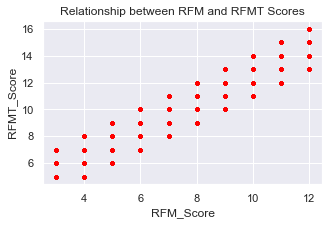

In [124]:
# Scatter plot between RFM and RFMT Scores
plt.figure(figsize = (5,3))
plt.scatter(datamart.RFM_Score, datamart.RFMT_Score, color = 'red', marker = '.')
plt.xlabel("RFM_Score")
plt.ylabel("RFMT_Score")
plt.title("Relationship between RFM and RFMT Scores")
plt.show()

## Analyzing RFMTS segments

In [125]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])+ str(x['T']) + str(x['S'])
datamart['RFMTS_Segment'] = datamart.apply(join_rfm, axis=1) 
datamart['RFMTS_Score'] = datamart[['R','F','M','T','S']].sum(axis=1)

In [126]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,S,RFM_Segment,RFM_Score,General_Segment,RFMT_Segment,RFMT_Score,General_Segment_2,RFMTS_Segment,RFMTS_Score
CustomerID,,,,,,,,,,,,,,,,,
12346.0,326,2,0.00,343,1,1,1,3,4,111,3.0,3.Bronze,1113,6.0,3.Bronze,11134,10.0
12347.0,2,182,4310.00,374,4,4,4,4,4,444,12.0,1.Gold,4444,16.0,1.Gold,44444,20.0
12348.0,75,31,1797.24,374,2,2,4,4,4,224,8.0,2.Silver,2244,12.0,1.Gold,22444,16.0
12349.0,19,73,1757.55,39,3,3,4,1,4,334,10.0,1.Gold,3341,11.0,2.Silver,33414,15.0
12350.0,310,17,334.40,312,1,1,2,3,4,112,4.0,3.Bronze,1123,7.0,3.Bronze,11234,11.0


In [127]:
def segment_me(df):
    if df['RFMTS_Score'] >= 15:
        return '1.Gold'
    elif (df['RFMTS_Score'] >= 10) and (df['RFMTS_Score'] < 15):
        return '2.Silver' 
    else:
        return '3.Bronze'

In [128]:
datamart['General_Segment_3'] = datamart.apply(segment_me, axis=1)

In [129]:
datamart.groupby('General_Segment').agg({ 
    'Recency': 'mean',
    'Frequency': 'mean', 
    'MonetaryValue': ['mean', 'count'],
    'Tenure': ['mean','count'],
    'S': ['count']
}).round(1)

Recency Frequency MonetaryValue       Tenure           S
                   mean      mean          mean count   mean count count
General_Segment                                                         
1.Gold             25.2     195.1        4130.3  1690  278.8  1690  1690
2.Silver           98.9      36.1         625.8  1899  198.2  1899  1899
3.Bronze          219.7      10.9         168.0   783  253.0   783   783

>**Conclusion_15:** Again, the number of people (1.690) in Gold segment hasn't changed. So our primary target segment for our promotions and advertisements stays the same

# Preprocessing for Machine Learning Part

### **Assumptions of K-Means**

1. Equal average values of variables

2. Equal standard deviation of variables

3. Symmetrical distribution of variables

**Sequence**
1. Unskew the data - log transformation
2. Standardize to the same average values
3. Scale to the same standard deviation
4. Store as a separate array to be used for clustering

## Step-1 Unskew the Data

In [130]:
# Extract only numerical values for machine learning part
datamart_rfm = datamart[['Recency','Frequency','MonetaryValue']]

In [131]:
# Use `describe` function to get key statistics of the dataset
datamart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,92.047118,93.053294,1898.459700
std,100.765435,232.471608,8219.345141
min,1.000000,1.000000,-4287.630000
25%,17.000000,17.000000,293.362500
50%,50.000000,42.000000,648.075000
75%,143.000000,102.000000,1611.725000
max,374.000000,7983.000000,279489.020000


>Although K-means assumes equal mean and equal variance, as we can see it from the above table, it's not the case with our data.  

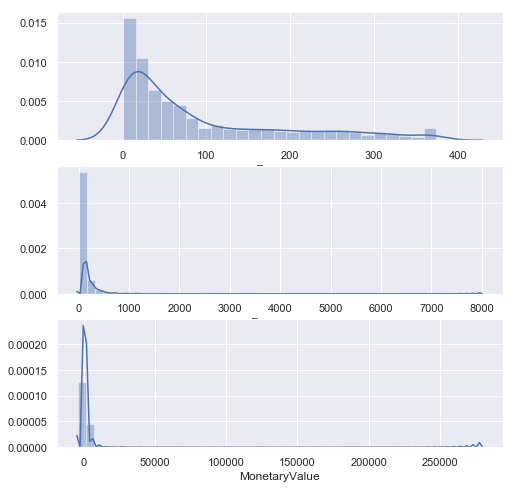

In [132]:
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1); sns.distplot(datamart['Recency'])

plt.subplot(3, 1, 2); sns.distplot(datamart['Frequency'])

plt.subplot(3, 1, 3); sns.distplot(datamart['MonetaryValue'])

plt.show()

>As we can see from the graphs above, all of data are right-skewed.

### **Data Transformations for Skewness**

**The easiest way to unskew the data is applying logarithmic transformation but it only works for positive values. There are other approaches like Box-Cox transformation but for sake of simplicity, logarithmic transformation is used here.**

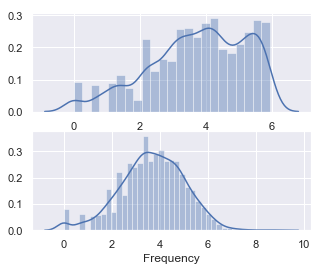

In [133]:
plt.figure(figsize=(5, 4))

recency_log = np.log(datamart['Recency'])
frequency_log = np.log(datamart['Frequency'])

plt.subplot(2, 1, 1); sns.distplot(recency_log)
plt.subplot(2, 1, 2); sns.distplot(frequency_log)

plt.show()

In [134]:
datamart['MonetaryValue'].min()

-4287.63

### Dealing with Negative Numbers

**1. Adding a constant before log transformation:**

This method is to add a constant number for each variables. The choice of value is arbitrary but the best practice is to add the absolute value of the lowest negative value to each observation and then a small constant like 1, to force the variables to be strictly positive

**2. Cube root transformation:** 

This method is calculating a cube root works well in some cases. The fortunate thing about customer behavior data is that it almost always positive, so we don't have to worry about this.

In [135]:
# Adding the absolute value of lowest negative number (4287.63) and a small constant (1). Total is 4288.63
datamart['MonetaryValue'] += 4288.63 

In [136]:
monetary_value_log = np.log(datamart.MonetaryValue)

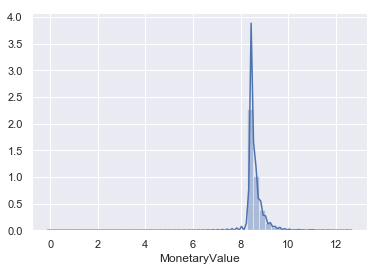

In [137]:
sns.distplot(monetary_value_log)

## Step_2 Centering and Scaling Data 

- **Method-1**: Subtract mean and divide by standard deviation manually
- **Method-2**: Use a scaler from scikit-learn (returns numpy.ndarray object) 

In [138]:
datamart_rfm.MonetaryValue.min()

-4287.63

In [139]:
datamart_rfm['MonetaryValue'] += 4288.63 

/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
datamart_log = np.log(datamart_rfm)

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized = scaler.transform(datamart_log)

In [142]:
print('mean: ', datamart_normalized.mean(axis=0).round(2)) 
print('std: ', datamart_normalized.std(axis=0).round(2))

mean:  [-0.  0.  0.]
std:  [1. 1. 1.]


In [143]:
# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

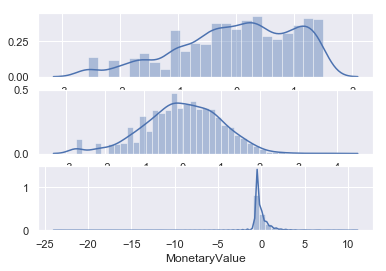

In [144]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

# Run KMeans

### n_clusters = 2

In [145]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters = 2, random_state = 1)

# Fit k-means clustering on the normalized data set
kmeans.fit (datamart_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [146]:
# Extract cluster labels
cluster_labels_2 = kmeans.labels_

In [147]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k2 = datamart_rfm.assign(Cluster=cluster_labels_2)

# Group the data by cluster
grouped_2 = datamart_rfm_k2.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped_2.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count','sum']
  }).round(1)

Recency Frequency MonetaryValue                  
           mean      mean          mean count         sum
Cluster                                                  
0          22.4     191.3        8322.1  1728  14380643.9
1         137.6      28.9        4791.7  2644  12669312.3

In [148]:
datamart_rfm_k2.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,4288.63,1
12347.0,2,182,8598.63,0
12348.0,75,31,6085.87,1
12349.0,19,73,6046.18,0
12350.0,310,17,4623.03,1


### n_clusters = 3

In [149]:
# Initialize KMeans
kmeans = KMeans(n_clusters = 3, random_state = 1)

# Fit k-means clustering on the normalized data set
kmeans.fit (datamart_normalized)

# Extract cluster labels
cluster_labels_3 = kmeans.labels_

In [150]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels_3)

# Group the data by cluster
grouped_3 = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped_3.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count', 'sum']
  }).round(1)

Recency Frequency MonetaryValue                  
           mean      mean          mean count         sum
Cluster                                                  
0          33.4      97.9        5647.5  1912  10798112.4
1         163.1      22.1        4718.3  2042   9634806.7
2          13.1     417.6       15830.2   418   6617037.0

In [151]:
datamart_rfm_k3.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,4288.63,1
12347.0,2,182,8598.63,2
12348.0,75,31,6085.87,1
12349.0,19,73,6046.18,0
12350.0,310,17,4623.03,1


### Choosing the number of clusters

**There are three Methods:**
> **1. Visual methods - elbow criterion:** 

* Plot the number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster center

* Identify an "elbow" in the plot

* Elbow - a point representing an "optimal" number of clusters

> **2. Mathematical methods - silhouette coefficient:**

> **3. Experimentation and interpretation (analyzing segments):**

* Build clustering at and around elbow solution
* Analyze their properties - average RFM values
* Compare against each other and choose one which makes most business sense

### Visual methods - Elbow Method:

In [152]:
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

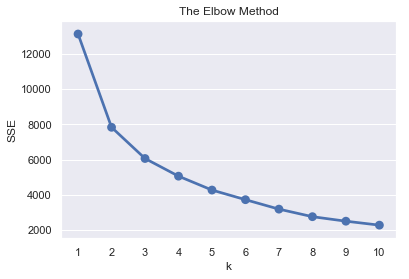

In [153]:
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

>**Conclusion:** When applying elbow criterion method. It is always best to choose the point on elbow, or the next point. We can use this as a guide but test multiple solutions. According to the graph above, 2 cluster seems the most optimal one. We will try 2 and 3 clusters.

# Profile and interpret segments

**Approaches to build customer personas**

> 1. Summary statistics for each cluster e.g. average RFM values

> 2. Snake plots (from market research)

> 3. Relative importance of cluster attributes compared to population

### Summary statistics for 2 clusters

In [154]:
# Calculate average RFM values and segment sizes per cluster value- For 2 Clusters
grouped_2.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count', 'sum']
  }).round(1)

Recency Frequency MonetaryValue                  
           mean      mean          mean count         sum
Cluster                                                  
0          22.4     191.3        8322.1  1728  14380643.9
1         137.6      28.9        4791.7  2644  12669312.3

### Summary statistics for 3 clusters

In [155]:
# Calculate average RFM values and segment sizes per cluster value
grouped_3.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count', 'sum']
  }).round(1)

Recency Frequency MonetaryValue                  
           mean      mean          mean count         sum
Cluster                                                  
0          33.4      97.9        5647.5  1912  10798112.4
1         163.1      22.1        4718.3  2042   9634806.7
2          13.1     417.6       15830.2   418   6617037.0

**Conclusion:**
> We just compare these two clusters. As we can see fromm the above tables, there are some inherent differences between 2-cluster and 3-cluster solutions. While 2-cluster solution is simplier, 3-cluster gives more insight. But 2-cluster solution is more in line with our RFM analysis solution (in Gold segment, we have 1.690 customers, in 2-cluster segment, we have 1.728 customers. And these segments' total monetary valeu are almost the same, which is 14 million $)

### 2. Snake plots

We use snake plots to understand and compare segments. Snake plots are a market research technique plotting different segments and their RFM Values on a line chart.  But we need to normalize the data (center and scale) so that the values would be comparable. Finally we plot each cluster's average values on a line plot. 

First, we create a DataFrame from our normalized NumPy array.

In [156]:
# Transform datamart_normalized as DataFrame and add a Cluster column

# We will pass it to the pandas DataFrame function, and use the index and columns from the original datamart_rfm

datamart_normalized = pd.DataFrame(datamart_normalized, 
                                   index=datamart_rfm.index, 
                                   columns=datamart_rfm.columns)
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']

For easier plotting, we will melt the data into a long form format so RFM values and metric names are stored in 1 column each.

In [157]:
# We basically melt the three RFM columns and create one called attribute.
datamart_melt = pd.melt(datamart_normalized.reset_index(), 
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                    var_name='Attribute', 
                    value_name='Value')

In [178]:
datamart_melt.head(15)

,CustomerID,Cluster,Attribute,Value
0,12346.0,1,Recency,1.402917
1,12347.0,2,Recency,-2.075135
2,12348.0,1,Recency,0.399593
3,12349.0,0,Recency,-0.537936
4,12350.0,1,Recency,1.368554
5,12352.0,0,Recency,-0.101567
6,12353.0,1,Recency,1.082832
7,12354.0,1,Recency,1.170653
8,12355.0,1,Recency,1.115508
9,12356.0,0,Recency,-0.407482


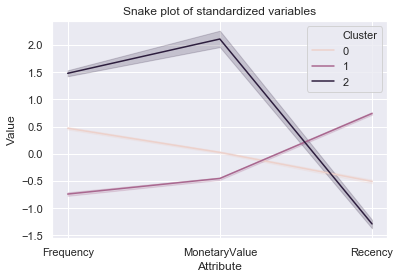

In [159]:
# Visualize the snake plot. It makes it very easy and intuitive to interpret, compare the segments and identify interesting insights.
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)
plt.show()

### 3. Relative importance of cluster attributes compared to population

In this technique, we want our segments to differ from the overall population, and have distinctive properties of their own. We can use this technique identify relative importance of each attribute.
>* First, we calculate the average RFM values for each cluster.
>* Then, we do the same for the total population.(Calculate average values of population)
>* Finally, we calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average) from the result.
>* The result is a relative importance score for each RFM value of the segments. 
>* The further a ratio is from 0, the more important that attribute is for defining a specific cluster compared to the population average.

In [160]:
# Calculate the average RFM values for each cluster.

cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()

In [161]:
cluster_avg

,Recency,Frequency,MonetaryValue
Cluster,,,
0,33.396444,97.914749,5647.548342
1,163.125367,22.071499,4718.318663
2,13.095694,417.574163,15830.232129


In [162]:
# Calculate average values of population

population_avg = datamart_rfm.mean()

In [163]:
population_avg 

Recency            92.047118
Frequency          93.053294
MonetaryValue    6187.089700
dtype: float64

In [164]:
# Calculate importance score by dividing them and subtracting 1 

relative_imp = cluster_avg / population_avg - 1 #ensures 0 is returned when cluster average equals population average

In [165]:
# The further a ratio is from 0, the more important that attribute is for defining a specific cluster compared to the population average.

relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.64,0.05,-0.09
1,0.77,-0.76,-0.24
2,-0.86,3.49,1.56


**Relative importance heatmap**

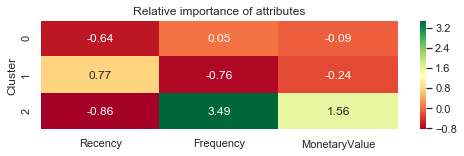

In [166]:
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

## Summary for Customer Segmentation

### Key steps of the segmentation project

>* Gather data - updated data with an additional variable,
>* Pre-process the data,
>* Explore the data and decide on the number of clusters,
>* Run k-means clustering,
>* Analyze and visualize results.

# Effective Cross selling

Cross selling is the ability to sell more products to a customer by analyzing the customer’s shopping trends and the general shopping trends. 

> **Itemset** is just a collection of one or more items that occur together in a transaction. For example, {milk, bread} is example of an itemset.

> **Support** is defined as number of times an itemset appears in the dataset.

> **Confidence** is a measure of the times the number of times a rule is found to exist in the dataset. 

> **Lift** is defined as the ratio of observed support to the support expected in the case the elements of the rule were independent.

> **Frequent itemsets** are itemsets whose support is greater than a user defined support threshold.

## Loading and Filtering Dataset

In [167]:
import csv
import matplotlib.pyplot as plt
import Orange
from Orange.data import Domain, DiscreteVariable, ContinuousVariable
from orangecontrib.associate.fpgrowth import *

%matplotlib inline

We have created a function (**prune_dataset**) which will help us reduce the size of our dataset (we reduce the size of the items) based on our requirements. The function can be used for performing two types of pruning:
>• Pruning based on percentage of total sales: The parameter **total_sales_perc** will help us select the number of items that will explain the required percentage of sales. The default value is 50% or 0.5.

>• Pruning based on ranks of items: Another way to perform the pruning is to specify the starting (**start_item**) and the ending rank (**end_item**) of the items for which we want to prune our dataset.

**length_trans:** by default, we will only look for transactions which have at least two items,

In [168]:
def prune_dataset(input_df, length_trans = 2, total_sales_perc = 0.5, start_item = None, end_item = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending = False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',item_count.columns[1]:'item_count'}, inplace=True)
    if not start_item and not end_item: 
        item_count['item_perc'] = item_count['item_count']/total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]

## Building Transaction Dataset

In [173]:
items = list(df.Description.unique())
grouped = df.groupby('InvoiceNo')
transaction_level_df = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]

In [174]:
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level_df.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})
new = [v for k,v in temp.items()]
tranasction_df = pd.DataFrame(new)
del(tranasction_df[tranasction_df.columns[0]])

In [175]:
tranasction_df.shape

(22190, 3895)

In [176]:
tranasction_df.head(5)

,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 BIRDS CANVAS SCREEN,3 BLACK CATS W HEARTS BLANK CARD,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 PINK HEN+CHICKS IN BASKET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 RAFFIA RIBBONS VINTAGE CHRISTMAS,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAL COOKIE CUTTERS SET,3 TRADITIONAl BISCUIT CUTTERS SET,3 WHITE CHOC MORRIS BOXED CANDLES,3 WICK CHRISTMAS BRIAR CANDLE,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE POSY,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF CAT STICKERS,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 BLUE DINNER CANDLES SILVER FLOCK,4 BURGUNDY WINE DINNER CANDLES,4 IVORY DINNER CANDLES SILVER FLOCK,4 LAVENDER BOTANICAL DINNER CANDLES,4 LILY BOTANICAL DINNER CANDLES,4 PEAR BOTANICAL DINNER CANDLES,4 PINK DINNER CANDLE SILVER FLOCK,4 PINK FLOCK CHRISTMAS BALLS,4 ROSE PINK DINNER CANDLES,4 SKY BLUE DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,4 VANILLA BOTANICAL CANDLES,4 WILDFLOWER BOTANICAL CANDLES,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,5 STRAND GLASS NECKLACE AMBER,5 STRAND GLASS NECKLACE AMETHYST,5 STRAND GLASS NECKLACE BLACK,5 STRAND GLASS NECKLACE CRYSTAL,50'S CHRISTMAS PAPER GIFT BAG,50CM METAL STRING WITH 7 CLIPS,6 CHOCOLATE LOVE HEART T-LIGHTS,6 EGG HOUSE PAINTED WOOD,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS ELEGANT CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 RIBBONS SHIMMERING PINKS,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 GOLD AND SILVER FAIRY CAKE CASES,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,70'S ALPHABET WALL ART,72 CAKE CASES VINTAGE CHRISTMAS,72 SWEETHEART FAIRY CAKE CASES,75 BLACK PETIT FOUR CASES,75 GREEN FAIRY CAKE CASES,75 GREEN PETIT FOUR CASES,A PRETTY THANK YOU CARD,A4 WALL TIDY BLUE OFFICE,A4 WALL TIDY RED FLOWERS,ABC TREASURE BOOK BOX,ABSTRACT CIRCLE JOURNAL,ABSTRACT CIRCLES POCKET BOOK,ABSTRACT CIRCLES SKETCHBOOK,ACRYLIC GEOMETRIC LAMP,"ACRYLIC HANGING JEWEL,BLUE","ACRYLIC HANGING JEWEL,PINK","ACRYLIC JEWEL ANGEL,PINK","ACRYLIC JEWEL ICICLE, BLUE","ACRYLIC JEWEL ICICLE, PINK","ACRYLIC JEWEL SNOWFLAKE, PINK","ACRYLIC JEWEL SNOWFLAKE,PINK",ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AFGHAN SLIPPER SOCK PAIR,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE 

The following code will help us reduce the number of features from 3895 to 15. We just pick 15 as a common sense number. 

In [177]:
output_df_n, item_counts_n = prune_dataset(input_df=tranasction_df, length_trans=2, start_item=0, end_item=15)
print(output_df_n.shape)

(4724, 15)


So we find out that we have only 15 items responsible for 50% of sales and 4724 transactions that have those items along with other items and we can also see what those items are. The next step is to convert this selected data into the required Table data structure.

In [228]:
output_df_n.head()

,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,JUMBO BAG RED RETROSPOT,PARTY BUNTING,ASSORTED COLOUR BIRD ORNAMENT,LUNCH BAG RED RETROSPOT,SET OF 3 CAKE TINS PANTRY DESIGN,POSTAGE,LUNCH BAG BLACK SKULL.,PACK OF 72 RETROSPOT CAKE CASES,SPOTTY BUNTING,LUNCH BAG SPACEBOY DESIGN,PAPER CHAIN KIT 50'S CHRISTMAS,LUNCH BAG CARS BLUE,NATURAL SLATE HEART CHALKBOARD
13,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
23,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
33,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
36,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


## Association Rule Mining with FP Growth¶

In [229]:
input_assoc_rules = output_df_n
domain_transac = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_tran = Orange.data.Table.from_numpy(domain=domain_transac,  X=input_assoc_rules.as_matrix(),Y= None)
data_tran_en, mapping = OneHot.encode(data_tran, include_class=True)

/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


The last line above is required for coding our input so that the entire domain is represented as binary variables. This will complete all the parsing and data manipulation required for our rule-mining.

The final step is creating our rules. We need to specify two pieces of information for generating our rules: **support and confidence**. An important piece of information is to start with a higher support, as lower support will mean a higher number of frequent itemsets and hence a longer execution time. We will specify a min- **support** of 0.01—47 transactions at least—and see the number of frequent itemsets that we get before we specify confidence and generate our rules.

In [230]:
support = 0.01
print("num of required transactions = ", int(input_assoc_rules.shape[0]*support))
num_trans = input_assoc_rules.shape[0]*support
itemsets = dict(frequent_itemsets(data_tran_en, support))

num of required transactions =  47


In [231]:
len(itemsets)

661348

So we get a **661,348 itemsets for a support of only 1%!** This will increase exponentially if we decrease the support or if we increase the number of items in our dataset. Next, we will specify a confidence value and generate our rules. The code below will take a confidence value and generate the rules that fulfill our specific support and confidence criteria. 

These rules are decoded using the mapping and variable names. Orange3-Associate also provides a helper function that will help us extract metrics about each of these rules. 

The code below will perform rule generation and decoding of rules, and then compile it all in a dataframe that we can use for further analysis.

In [232]:
confidence = 0.3
rules_df = pd.DataFrame()
if len(itemsets) < 1000000: 
    rules = [(P, Q, supp, conf)
    for P, Q, supp, conf in association_rules(itemsets, confidence)
       if len(Q) == 1 ]

    names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_tran, mapping)}
    
    eligible_ante = [v for k,v in names.items() if v.endswith("1")]
    
    N = input_assoc_rules.shape[0]
    
    rule_stats = list(rules_stats(rules, itemsets, N))
    
    rule_list_df = []
    for ex_rule_frm_rule_stat in rule_stats:
        ante = ex_rule_frm_rule_stat[0]            
        cons = ex_rule_frm_rule_stat[1]
        named_cons = names[next(iter(cons))]
        if named_cons in eligible_ante:
            rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
            ante_rule = ', '.join(rule_lhs)
            if ante_rule and len(rule_lhs)>1 :
                rule_dict = {'support' : ex_rule_frm_rule_stat[2],
                             'confidence' : ex_rule_frm_rule_stat[3],
                             'coverage' : ex_rule_frm_rule_stat[4],
                             'strength' : ex_rule_frm_rule_stat[5],
                             'lift' : ex_rule_frm_rule_stat[6],
                             'leverage' : ex_rule_frm_rule_stat[7],
                             'antecedent': ante_rule,
                             'consequent':named_cons[:-2] }
                rule_list_df.append(rule_dict)
    rules_df = pd.DataFrame(rule_list_df)
    print("Raw rules data frame of {} rules generated".format(rules_df.shape[0]))
    if not rules_df.empty:
        pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
    else:
        print("Unable to generate any rule")

Raw rules data frame of 80440 rules generated


We can change the item number, consequent, antecedent, support, and confidence values to generate different rules. Let’s take some sample rules generated using transactions that explain 40% of total sales, min-support of 1% (required number of transactions >=45) and confidence greater than 3%. Here, we have collected rules having maximum lift for each of the items that can be a consequent (that appear on the right side) by using the following code.

## Sort and display rules

In [233]:
dw = pd.options.display.max_colwidth
pd.options.display.max_colwidth = 100
(pruned_rules_df[['antecedent','consequent',
                  'support','confidence','lift']].groupby('consequent')
                                                 .max()
                                                 .reset_index()
                                                 .sort_values(['lift', 'support','confidence'],
                                                              ascending=False)).head()

,consequent,antecedent,support,confidence,lift
4,LUNCH BAG SPACEBOY DESIGN,"WHITE HANGING HEART T-LIGHT HOLDER, LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE",257,0.675676,3.643712
2,LUNCH BAG CARS BLUE,"WHITE HANGING HEART T-LIGHT HOLDER, LUNCH BAG SPACEBOY DESIGN",263,0.657895,3.511745
1,LUNCH BAG BLACK SKULL.,"WHITE HANGING HEART T-LIGHT HOLDER, LUNCH BAG SPACEBOY DESIGN , LUNCH BAG CARS BLUE",263,0.692308,3.501565
3,LUNCH BAG RED RETROSPOT,"WHITE HANGING HEART T-LIGHT HOLDER, LUNCH BAG SPACEBOY DESIGN , LUNCH BAG CARS BLUE",263,0.818182,3.239808
6,SPOTTY BUNTING,"WHITE HANGING HEART T-LIGHT HOLDER, PARTY BUNTING",78,0.478571,2.733702


> Let’s interpret the first rule, which states that:
{WHITE HANGING HEART T-LIGHT HOLDER, LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE -->LUNCH BAG SPACEBOY DESIGN}
The first rule means that people who bought white hanging heart t-light holder, lunch bag red retrospot and lunch bag cars blue tend to lunch bag spacebiy desing. 

> Let’s try to understand the metrics.

> **Support** of the rule is 257, which means, all the items together appear in 257 transactions in the dataset.

> **Confidence** of the rule is 67%, which means that 67% of the time the antecedent items occurred we also had the consequent
in the transaction (i.e. 67% of times, customers who bought the left side items also bought lunch bag spacebiy design).

> **Lift** means that the probability of finding consequent in the transactions which have antecendent is greater than the normal probability. So the higher the lift, the better it is. the main idea is that we are looking for greater lifts. 

**Conclusion:** This analysis is very important for sellers' perspective, as they can bundle specific products like these (antecendent and consequent) together or run a marketing scheme that offers discount on buying them together. It is also very useful input for web designers as they can put those related items close to each other. 

### Creating MonetaryValue Quartiles

In [ ]:
#In pandas we already have a function bulit in for calculating percentiles called qcut().  First we will use the qcut() function on the Spend Variable and define 4 groups of equal sizes-called quartiles.

#We will also pass a range() function to the labels argument so our groups have integer names, with highest value quartile labeled as 4, and lowest as 1

In [ ]:
sendback_quartile = pd.qcut(df['Amount'], q=4, labels = range (1,5))

In [ ]:
# Assign the quartile values to the Spend_Quartile column in data
#df['Spend_Quartile'] = spend_quartiles
# df.head(1)

In [ ]:
# Print data with sorted Spend values
#df.sort_values('Amount')

In [ ]:
> **Conclusion_12:** We have assigned spend quartiles to each customer with numeric labels! Now, we have categorized each customer based on their spending amount